In [ ]:
#Importing the libraries
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import statsmodels.api as sm

# import warnings
import warnings
warnings.filterwarnings("ignore")

# We will use some methods from the sklearn module
from sklearn import linear_model
from sklearn.linear_model import LinearRegression
from sklearn import metrics
from sklearn.metrics import r2_score
from sklearn.metrics import mean_squared_error, mean_absolute_error
from sklearn.model_selection import train_test_split, cross_val_score

In [ ]:
# Reading the Dataset
df = pd.read_csv("/content/521.csv")
df = df.iloc[300:]
df = df.iloc[:-300]
df.head()

,cycles:u,instructions:u,branch-misses:u,cache-misses:u,L1-dcache-load-misses,L1-icache-load-misses,LLC-load-misses,LLC-store-misses,branch-load-misses,dTLB-load-misses,...,itlb_misses.walk_pending:u,dtlb_store_misses.walk_pending:u,dtlb_load_misses.walk_pending:u.1,offcore_requests.l3_miss_demand_data_rd:u,ocr.hwpf_l2_rfo.l3_miss:u,ocr.demand_data_rd.l3_miss:u,icache_64b.iftag_miss:u,page-faults:u,IPC,CPI
300,308319123,641602491,285031,403735,3044747,1378872,23775,95798,810953,160,...,131880,26928,38726,2718,6419,3546,8518,881,2.08,0.480545
301,303990520,698329462,535469,1683825,11826402,340976,38512,99691,527240,8131,...,129168,1463592,1149712,73664,481236,13411,10154,430,2.30,0.435311
302,300598504,434033951,635518,2182038,10538874,30942,91713,213200,698089,3738,...,146488,683341,970492,94898,297527,172194,21650,314,1.44,0.692569
303,300301642,452687312,930941,815765,4511182,56509,113424,69791,990130,1307,...,62556,9639,14305,977,4196,3350,38418,4,1.51,0.663375
304,298957759,818504483,444215,2063509,6284544,40186,143862,265107,192119,531,...,135021,1475805,687018,140492,814718,267139,32193,734,2.74,0.365249


In [ ]:
#Setting the value for X and Y
df.drop(['dtlb_load_misses.walk_pending:u.1'],axis=1,inplace = True)
df.drop_duplicates(inplace = True)
df.drop_duplicates(inplace = True)
X = df[['branch-misses:u', 'cache-misses:u', 'L1-dcache-load-misses', 'L1-icache-load-misses', 'LLC-load-misses', 'LLC-store-misses', 'branch-load-misses', 'dTLB-load-misses', 'dTLB-store-misses', 'iTLB-load-misses', 'l2_rqsts.code_rd_miss:u', 'l2_rqsts.demand_data_rd_miss:u', 'l2_rqsts.all_demand_miss:u', 'dtlb_load_misses.walk_pending:u', 'itlb_misses.walk_pending:u', 'dtlb_store_misses.walk_pending:u', 'offcore_requests.l3_miss_demand_data_rd:u', 'ocr.hwpf_l2_rfo.l3_miss:u', 'ocr.demand_data_rd.l3_miss:u', 'icache_64b.iftag_miss:u']]
i = df['instructions:u'].values.reshape(-1,1)
y = df['CPI']
X = np.divide(X,i)
df_new = X.copy()
df_new['CPI'] = y
df_new.shape

(5217, 21)

<Axes: >

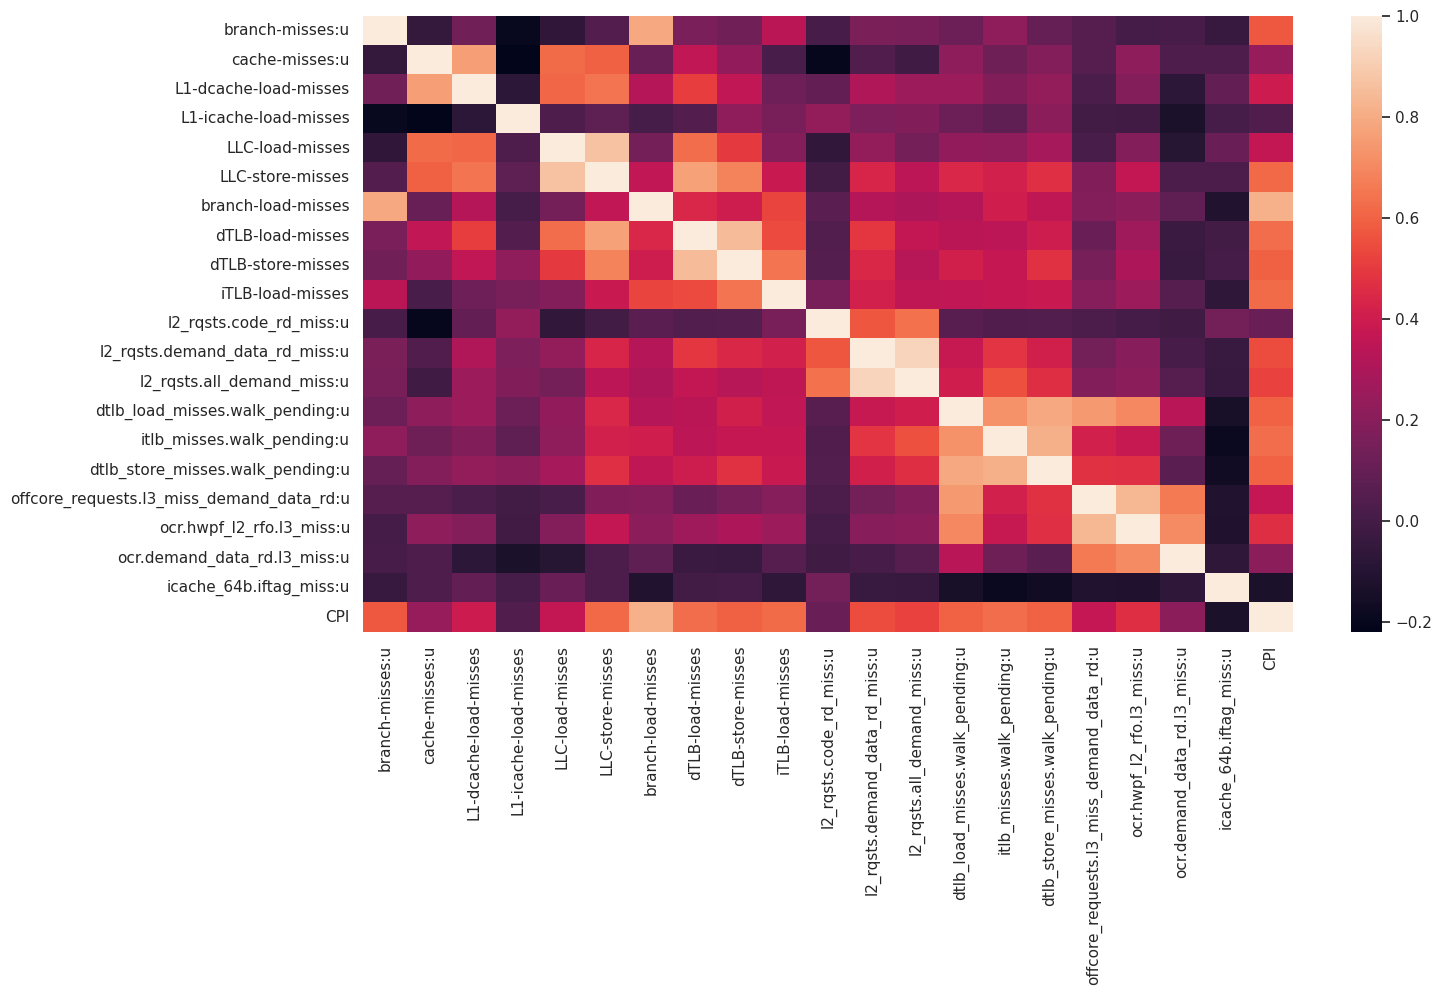

In [ ]:
corr = df_new.corr()
plt.figure (figsize = (15,8))
sns.heatmap(corr, annot = True)

In [ ]:
X.drop(['branch-misses:u','offcore_requests.l3_miss_demand_data_rd:u','dTLB-store-misses','LLC-load-misses','L1-dcache-load-misses','icache_64b.iftag_miss:u','l2_rqsts.code_rd_miss:u','L1-icache-load-misses','ocr.demand_data_rd.l3_miss:u','dtlb_load_misses.walk_pending:u'],axis=1,inplace = True)
X.head()

,cache-misses:u,LLC-store-misses,branch-load-misses,dTLB-load-misses,iTLB-load-misses,l2_rqsts.demand_data_rd_miss:u,l2_rqsts.all_demand_miss:u,itlb_misses.walk_pending:u,dtlb_store_misses.walk_pending:u,ocr.hwpf_l2_rfo.l3_miss:u
300,0.000629,0.000149,0.001264,2.493756e-07,3.980658e-06,0.000989,0.001059,0.000206,0.000042,0.000010
301,0.002411,0.000143,0.000755,1.164350e-05,3.270663e-06,0.000317,0.000268,0.000185,0.002096,0.000689
302,0.005027,0.000491,0.001608,8.612230e-06,1.843174e-07,0.000711,0.001144,0.000338,0.001574,0.000685
303,0.001802,0.000154,0.002187,2.887203e-06,4.559439e-06,0.000076,0.000258,0.000138,0.000021,0.000009
304,0.002521,0.000324,0.000235,6.487442e-07,1.038479e-07,0.000005,0.000033,0.000165,0.001803,0.000995


In [ ]:
#Fitting the Multiple Linear Regression model
mlr = LinearRegression()

In [ ]:
#Splitting dataset
X_train,X_test, y_train, y_test = train_test_split(X, y, test_size = 0.2, random_state = 100)

In [ ]:
model = mlr.fit(X_train,y_train)

In [ ]:
#Intercept and Coefficient
print("Intercept: ", mlr.intercept_)
print("Coefficients:")
list(zip(X, mlr.coef_))

Intercept:  0.1155292879347648
Coefficients:


[('cache-misses:u', 2.3257585501568783),
 ('LLC-store-misses', 173.45187095920957),
 ('branch-load-misses', 216.31246068659655),
 ('dTLB-load-misses', 1467.2244979550828),
 ('iTLB-load-misses', 11157.704106118174),
 ('l2_rqsts.demand_data_rd_miss:u', 46.05350207280364),
 ('l2_rqsts.all_demand_miss:u', 26.59748507518176),
 ('itlb_misses.walk_pending:u', 188.00567760654022),
 ('dtlb_store_misses.walk_pending:u', 15.43236022816734),
 ('ocr.hwpf_l2_rfo.l3_miss:u', 95.19859286017424)]

In [ ]:
#Prediction of test set
y_pred_mlr= mlr.predict(X_test)
#Predicted values
print("Prediction for test set: {}".format(y_pred_mlr))

Prediction for test set: [0.47083393 0.74403822 0.65059688 ... 0.32533464 0.64535066 0.31365923]


In [ ]:
#Actual value and the predicted value
mlr_diff = pd.DataFrame({'Actual value': y_test, 'Predicted value': y_pred_mlr})
mlr_diff.head()

,Actual value,Predicted value
4007,0.633875,0.470834
1857,0.608763,0.744038
5012,0.772300,0.650597
4341,0.591989,0.659051
2611,0.728530,0.730437


In [ ]:
#Model Evaluation
from sklearn import metrics
meanAbErr = metrics.mean_absolute_error(y_test, y_pred_mlr)
meanSqErr = metrics.mean_squared_error(y_test, y_pred_mlr)
rootMeanSqErr = np.sqrt(metrics.mean_squared_error(y_test, y_pred_mlr))
r2 = mlr.score(X_test,y_test)
print('R squared: {:.2f}'.format(r2*100))
print('Mean Absolute Error:', meanAbErr)
print('Mean Square Error:', meanSqErr)
print('Root Mean Square Error:', rootMeanSqErr)

R squared: 86.97
Mean Absolute Error: 0.11456282573638837
Mean Square Error: 0.024961773328405223
Root Mean Square Error: 0.1579929534137685


In [ ]:
x_mean = X.mean()
R = np.multiply(x_mean,mlr.coef_)
print(R)
print(mlr.intercept_)
print(R.sum()+mlr.intercept_)

cache-misses:u                      0.005415
LLC-store-misses                    0.054975
branch-load-misses                  0.299545
dTLB-load-misses                    0.022207
iTLB-load-misses                    0.030061
l2_rqsts.demand_data_rd_miss:u      0.022600
l2_rqsts.all_demand_miss:u          0.022660
itlb_misses.walk_pending:u          0.046884
dtlb_store_misses.walk_pending:u    0.018569
ocr.hwpf_l2_rfo.l3_miss:u           0.056981
dtype: float64
0.1155292879347648
0.6954275725043713


In [ ]:
y_mean = y.mean()
print(y_mean)

0.695873779629864


In [ ]:
n = df_new.shape[0]
p = X.shape[1]

In [ ]:
#Adjusted r2 score
r2adj = 1-(1-r2)*(n-1)/(n-p-1)
print(r2adj*100)

86.94678089435813


In [ ]:
#Residuals
residuals = (y_test - y_pred_mlr)
print(residuals)

4007    0.163041
1857   -0.135276
5012    0.121703
4341   -0.067062
2611   -0.001907
          ...   
3266    0.018102
4789   -0.104989
2891    0.016166
1695    0.059915
2988    0.172161
Name: CPI, Length: 1044, dtype: float64


In [ ]:
#F-statistic
fstat = (r2/(1-r2))*((n-p-1)/p)
print(fstat)

3475.3491660915547


In [ ]:
#p-value
from scipy.stats import f
p_value = 1-f.cdf(fstat,p,n-p-1)
print(p_value)

1.1102230246251565e-16


In [ ]:
import pandas as pd
R = pd.concat([pd.Series([mlr.intercept_],index = ['Base CPI']), R])
print(R)

Base CPI                            0.115529
cache-misses:u                      0.005415
LLC-store-misses                    0.054975
branch-load-misses                  0.299545
dTLB-load-misses                    0.022207
iTLB-load-misses                    0.030061
l2_rqsts.demand_data_rd_miss:u      0.022600
l2_rqsts.all_demand_miss:u          0.022660
itlb_misses.walk_pending:u          0.046884
dtlb_store_misses.walk_pending:u    0.018569
ocr.hwpf_l2_rfo.l3_miss:u           0.056981
dtype: float64


[Text(0, 0.5, 'Residuals'), Text(0.5, 0, 'Predicted values')]

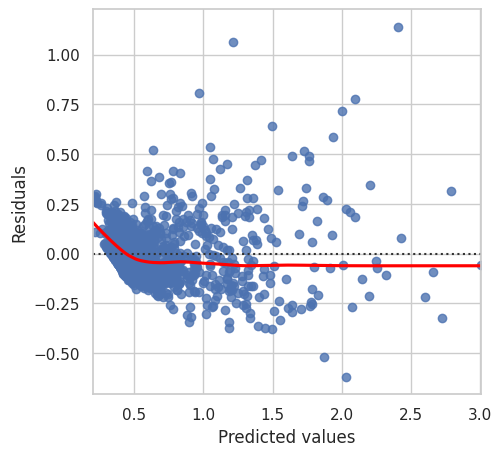

In [ ]:
sns.set(style="whitegrid")
fig, ax = plt.subplots(figsize =(5,5))
sns.residplot(x=y_pred_mlr,y=residuals,ax=ax, lowess=True, line_kws={"color": "red"})
ax.set(ylabel='Residuals',xlabel='Predicted values')

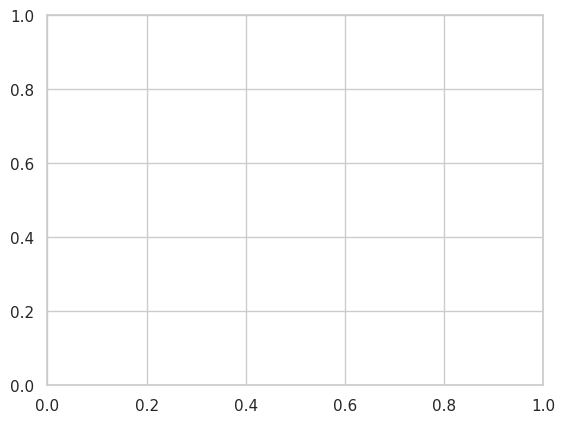

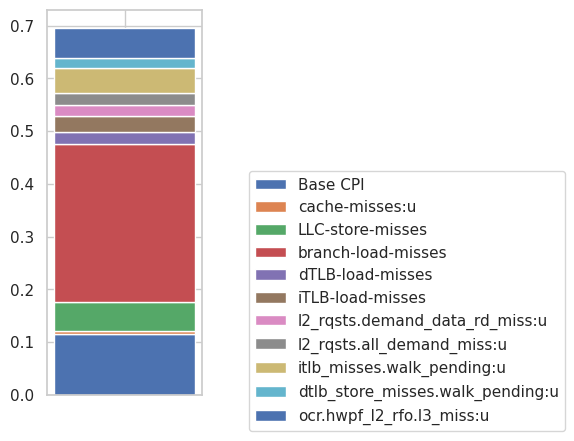

In [ ]:
fig, ax = plt.subplots()
groups = ['']
plt.figure (figsize = (2,5))
# Stacked bar chart with loop
for i in range(len(R)):
  plt.bar(groups, R[i],label = R.index[i], bottom = np.sum(R[:i], axis = 0))

plt.legend(bbox_to_anchor = (1.25, 0.6), loc='upper left')
plt.tight_layout()